Implementation of Principle Component analysis(PCA) algorithm

Import the necessary packages like numpy,pandas,matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset using pandas package

In [2]:
dataset = pd.read_csv("Iris Dataset.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


check the size of dataset

In [3]:
dataset.shape

(150, 6)

check for null values in the dataset

In [4]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now describe the dataset

In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Removing unwanted data i.e.Id column

In [6]:
dataset=dataset.drop(['Id'],axis=1)

Creating a PCA model without using any pre-defined libraries

Eigenvalues:
Eigenvalue 1: 2.930353775589313
Eigenvalue 2: 0.9274036215173417
Eigenvalue 3: 0.1483422264816399
Eigenvalue 4: 0.020746013995595784


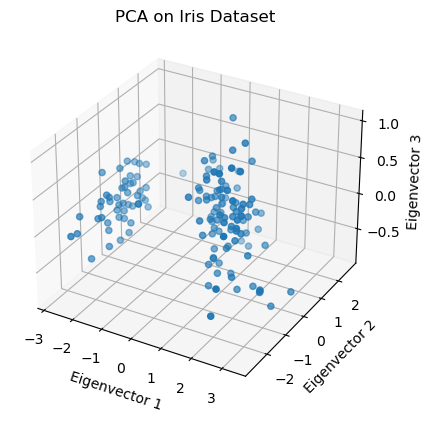

In [7]:
def pca(dataset):
    
    # Removing  the last column i.e.Species
    
    X = dataset.iloc[:, :-1].values
   
    # Normalizing the data
    X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # creating covariance matrix
    cov_matrix = np.cov(X_norm.T)
    
    # determining the eigen values and eigen vectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sorting the eigenvalues and their eigenvectors 
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # transformation of data
    transformed_data = np.dot(X_norm, sorted_eigenvectors)
    
    return sorted_eigenvectors, sorted_eigenvalues, transformed_data


# performing PCA algorithm
eigenvectors, eigenvalues, pca_result = pca(dataset)

# printing the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

# plotting the data using matplotlib package
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('Eigenvector 1')
ax.set_ylabel('Eigenvector 2')
ax.set_zlabel('Eigenvector 3')
ax.set_title('PCA on Iris Dataset')
plt.show()
